# pgm 9

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [101]:
def kernal(point,xmat,k):       # keep eye
    m,n=np.shape(xmat)
    weights=np.mat(np.eye(m))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):      
    wei=kernal(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeihtedRegression(xmat,ymat,k):    
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [104]:
def graphplot(X, ypred):  # (bill amount,predicted tips amount)
    sortindex = X[:, 1].argsort(0)
    # returns the index values in an order that would sort the input array
    xsort = X[sortindex][:, 0]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(bill, tip, color='green')  # to draw points
    ax.plot(xsort[:, 1], ypred[sortindex], color='red',
            linewidth=4)  # to draw the line

    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.show()

In [105]:
data=pd.read_csv('data10_tips.csv')

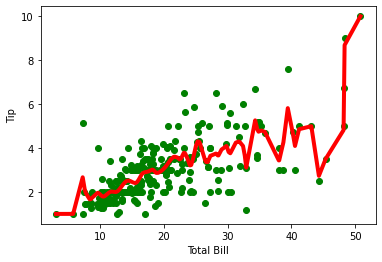

In [106]:
bill=np.array(data.total_bill)
tip=np.array(data.tip)
mbill=np.mat(bill)
mtip=np.mat(tip)
m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
X=np.hstack((one.T,mbill.T))
ypred=localWeihtedRegression(X,mtip,0.5)
graphplot(X,ypred)



# pgm 8

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
for i in range(len(iris.target_names)):
    print('{0}:{1}'.format(i,iris.target_names[i]))

X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target,random_state=0)

0:setosa
1:versicolor
2:virginica


In [200]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

x_new=np.array([[5,2.9,1,0.2]])
prediction=knn.predict(x_new)

for i in range(len(X_test)):
    x_new=np.array([X_test[i]])
    prediction=knn.predict(x_new)
    print('Actual:{0} {1},Predicted {2} {3}'.format(Y_test[i],iris.target_names[Y_test[i]],prediction,iris.target_names[prediction]))
print('Test score[Accuracy]: {:.2f}'.format(knn.score(X_test,Y_test)))

Actual:2 virginica,Predicted [2] ['virginica']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:0 setosa,Predicted [0] ['setosa']
Actual:2 virginica,Predicted [2] ['virginica']
Actual:0 setosa,Predicted [0] ['setosa']
Actual:2 virginica,Predicted [2] ['virginica']
Actual:0 setosa,Predicted [0] ['setosa']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:2 virginica,Predicted [2] ['virginica']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:0 setosa,Predicted [0] ['setosa']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:1 versicolor,Predicted [1] ['versicolor']
Actual:0 setosa,Predicted [0] ['setosa']
Actual:0 setosa,Predicted [0] ['setosa']
Actual:2 virginica,Predicted [2] ['virginica']
Actual:1 versicolor,Predicted

# pgm 7

###### dont run this program in many seperate cells

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import preprocessing

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

The Gaussina Mixture using Em algorihtm matches the true labels more closely than the kmeans


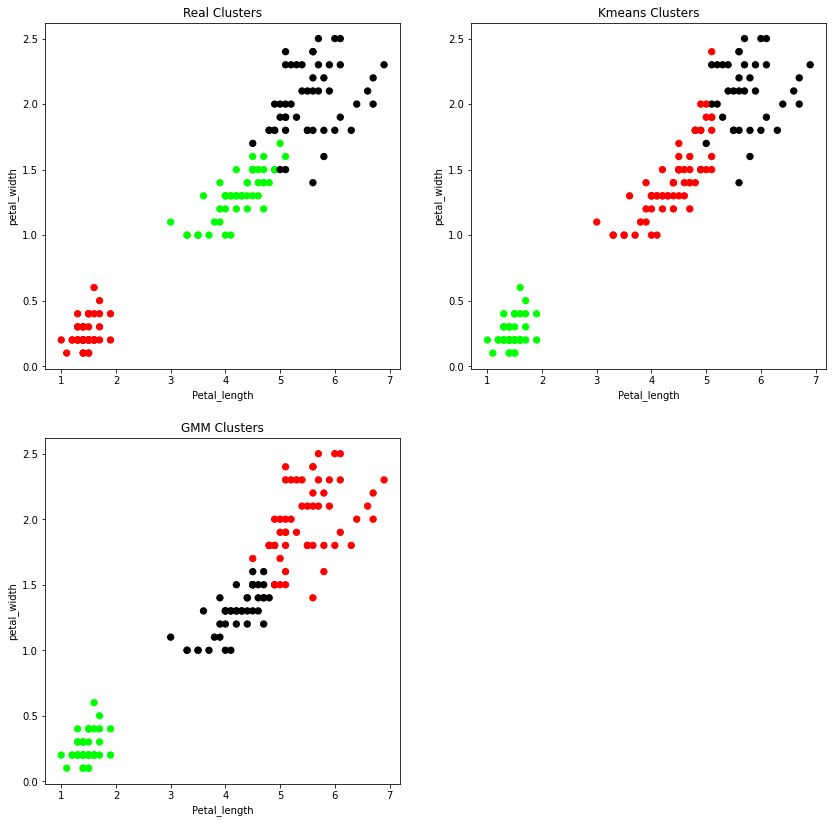

In [4]:
plt.figure(figsize=(14,14))
colorMap=np.array(['red','lime','black'])

plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,color=colorMap[y.Targets],s=40)
plt.title('Real Clusters')
plt.xlabel("Petal_length")
plt.ylabel('petal_width')

k=KMeans(n_clusters=3)
k.fit(X)

plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,color=colorMap[k.labels_],s=40)
plt.title('Kmeans Clusters')
plt.xlabel("Petal_length")
plt.ylabel('petal_width')

scalar=preprocessing.StandardScaler()
scalar.fit(X)
xsa=scalar.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)

plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,color=colorMap[gmm_y],s=40)
plt.title('GMM Clusters')
plt.xlabel("Petal_length")
plt.ylabel('petal_width')

print('The Gaussina Mixture using Em algorihtm matches the true labels more closely than the kmeans')
plt.show()

# pgm 5

In [164]:
import numpy as np

In [172]:
X=np.array(([2,9],[1,5],[3,6]))
Y=np.array(([92],[86],[89]))

X=X/np.max(X,axis=0) # erro possibility 
Y=Y/100

epoch=1000
eta=0.2
input_neurons=2
hidden_neurons=3
output_neurons=1

wh=np.random.uniform(size=(input_neurons,hidden_neurons))
bh=np.random.uniform(size=(1,hidden_neurons))
wo=np.random.uniform(size=(hidden_neurons,output_neurons))
bo=np.random.uniform(size=(1,output_neurons))

def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_grad(x):
    return x*(1-x)

for i in range(epoch):
    h_ip=np.dot(X,wh)+bh
    h_act=sigmoid(h_ip)
    o_ip=np.dot(h_act,wo)+bo
    output=sigmoid(o_ip)
    
    Eo=Y-output
    outgrad=sigmoid_grad(output)
    d_output=Eo*outgrad
    
    Eh=np.dot(d_output,wo.T)
    hiddengrad=sigmoid_grad(h_act)
    d_hidden=Eh*hiddengrad
    
    wo+=h_act.T.dot(d_output)*eta
    wh+=X.T.dot(d_hidden)*eta
    
print('Normalized input',X)
print('Actuall Ouput',Y)
print('Predicted Ouput',output)

Normalized input [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actuall Ouput [[0.92]
 [0.86]
 [0.89]]
Predicted Ouput [[0.89276446]
 [0.87972052]
 [0.89735119]]


# pgm 2

In [174]:
import numpy as np
import pandas as pd

In [184]:
data=pd.read_csv('ws.csv',header=None)
concepts=np.array(data.iloc[:,:-1])
target=np.array(data.iloc[:,-1])
for i,h in enumerate(concepts):
    print(i+1,h)

def learn(concepts,target):
    specific_h=concepts[0].copy()
    generic_h=[["?" for x in range(len(specific_h))] for x in range(len(specific_h))]
    print("initialization of s and g")
    print('specific boundary',specific_h)
    print('generic boundary',generic_h)
    for i,h in enumerate(concepts):
        if target[i]=='Yes':
            print('instance is positive')
            for x in range(len(specific_h)):
                if h[x]!=specific_h[x]:
                    specific_h[x]='?'
                    generic_h[x][x]='?'
        if target[i]=='No':
            print('instance is negative')
            for x in range(len(specific_h)):
                if h[x]!=specific_h[x]:
                    generic_h[x][x]=specific_h[x]
                else:
                    generic_h[x][x]='?'
        print('specific boundary after',i+1,'instance',specific_h)
        print('generic boundary after',i+1,'instance',generic_h)
    indices=[index for index,value in enumerate(generic_h) if value==['?', '?', '?', '?', '?', '?']]
    for i in range(len(indices)):
        generic_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h,generic_h
    
s_final,g_final=learn(concepts,target)
print("final specific_h",s_final)
print("final generic_h",g_final)

1 ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
2 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
3 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
4 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']
initialization of s and g
specific boundary ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
generic boundary [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
instance is positive
specific boundary after 1 instance ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
generic boundary after 1 instance [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
instance is positive
specific boundary after 2 instance ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
generic boundary after 2 instance [['?', '?', '?', '?', '?', '?

# pgm 1

In [199]:
def aStarAlgo(start_node,stop_node):
    openSet=set(start_node)
    closedSet=set()
    g={}
    parent={}
    g[start_node]=0
    parent[start_node]=start_node
    
    while(len(openSet)>0):
        n=None
        for v in openSet:
            if n==None or g[v]+heuristic(v)<g[n]+heuristic(n):
                n=v
        if n==stop_node or Graph_nodes[n]==None:
            pass
        else:
            for m,weight in getNeibours(n):
                if m not in openSet and m not in closedSet:
                    openSet.add(m)
                    g[m]=g[n]+weight
                    parent[m]=n
                else:
                    if g[m]>g[n]+weight:
                        g[m]=g[n]+weight
                        parent[m]=n
                        if m in closedSet:
                            closedSet.remove(m)
                            openSet.add(m)
        if n==None:
            print('Path doesnot exist')
            return None
        if n==stop_node:
            path=[]
            while parent[n]!=n:
                path.append(n)
                n=parent[n]
            path.append(start_node)
            path.reverse()
            print('Path exist')
            return path
        openSet.remove(n)
        closedSet.add(n)
    print('path doesnot exist')                
    return None


def getNeibours(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
    
def heuristic(n):
    H_dist={
        'S':5,
        'A':4,
        'B':5,
        'E':0
    }
    return H_dist[n]

Graph_nodes={
    'S':[('A',1),('B',2)],
    'A':[('E',13)],
    'B':[('E',5)]
}
aStarAlgo('S','E')

Path exist


['S', 'B', 'E']